In [1]:
#############################
# Python imports
#############################
# Standard python imports
import uproot
import random
import numpy as np
import matplotlib.pyplot as plt
# Creating a responsive 3D plot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib ipympl
from termcolor import colored, cprint

In [2]:
#############################
# Pull out things from file
#############################

fileName = '/Users/isobel/Desktop/MicroBooNE/2024/VisualiseSlice/files/reco_stage_2_hist.root'
treeFile = uproot.open(fileName)
tree = treeFile['visualiseSlice/VisualisationTree']
branches = tree.arrays()

# Event level info
event_main = branches['Event']
run_main = branches['Run']
subrun_main = branches['Subrun']
sliceCompleteness_main = branches['SliceCompleteness']
slicePurity_main = branches['SlicePurity']
# Event level visualisation
trueNuVertexX_main = branches['TrueNuVertexX']
trueNuVertexY_main = branches['TrueNuVertexY']
trueNuVertexZ_main = branches['TrueNuVertexZ']
uTrueNuVertex_wire_main = branches['UTrueNuVertex_wire']
vTrueNuVertex_wire_main = branches['VTrueNuVertex_wire']
wTrueNuVertex_wire_main = branches['WTrueNuVertex_wire']
recoNuVertexX_main = branches['RecoNuVertexX']
recoNuVertexY_main = branches['RecoNuVertexY']
recoNuVertexZ_main = branches['RecoNuVertexZ']
uRecoNuVertex_wire_main = branches['URecoNuVertex_wire']
vRecoNuVertex_wire_main = branches['VRecoNuVertex_wire']
wRecoNuVertex_wire_main = branches['WRecoNuVertex_wire']
allUHits_wire_main = branches['AllUHits_wire']
allUHits_drift_main = branches['AllUHits_drift']
allUHits_owner_main = branches['AllUHits_owner']
allUHits_isInSlice_main = branches['AllUHits_isInSlice']
allVHits_wire_main = branches['AllVHits_wire']
allVHits_drift_main = branches['AllVHits_drift']
allVHits_owner_main = branches['AllVHits_owner']
allVHits_isInSlice_main = branches['AllVHits_isInSlice']
allWHits_wire_main = branches['AllWHits_wire']
allWHits_drift_main = branches['AllWHits_drift']
allWHits_owner_main = branches['AllWHits_owner']
allWHits_isInSlice_main = branches['AllWHits_isInSlice']
# PFP level info 
truePDG_main = branches['TruePDG']
completeness_main = branches['Completeness']
purity_main = branches['Purity']
generation_main = branches['Generation']
pandoraPFPCode_main = branches['PandoraPFPCode']
# PFP level visualisation
recoVertexX_main = branches['RecoVertexX']
recoVertexY_main = branches['RecoVertexY']
recoVertexZ_main = branches['RecoVertexZ']
uRecoVertex_wire_main = branches['URecoVertex_wire']
uRecoVertex_drift_main = branches['URecoVertex_drift']
vRecoVertex_wire_main = branches['VRecoVertex_wire']
vRecoVertex_drift_main = branches['VRecoVertex_drift']
wRecoVertex_wire_main = branches['WRecoVertex_wire']
wRecoVertex_drift_main = branches['WRecoVertex_drift']
uHits_wire_main = branches['UHits_wire']
uHits_drift_main = branches['UHits_drift']
vHits_wire_main = branches['VHits_wire']
vHits_drift_main = branches['VHits_drift']
wHits_wire_main = branches['WHits_wire']
wHits_drift_main = branches['WHits_drift']
spacePointsX_main = branches['SpacePointsX']
spacePointsY_main = branches['SpacePointsY']
spacePointsZ_main = branches['SpacePointsZ']

In [3]:
#######################################
# Index of event in file to view
#######################################

iEvent = 3

In [4]:
#######################################
# Get event arrays
#######################################
# Event level info
event_event = event_main[iEvent]
run_event = run_main[iEvent]
subrun_event = subrun_main[iEvent]
sliceCompleteness_event = sliceCompleteness_main[iEvent]
slicePurity_event = slicePurity_main[iEvent]
# Event level visualisation
trueNuVertexX_event = trueNuVertexX_main[iEvent]
trueNuVertexY_event = trueNuVertexY_main[iEvent]
trueNuVertexZ_event = trueNuVertexZ_main[iEvent]
uTrueNuVertex_wire_event = uTrueNuVertex_wire_main[iEvent]
vTrueNuVertex_wire_event = vTrueNuVertex_wire_main[iEvent]
wTrueNuVertex_wire_event = wTrueNuVertex_wire_main[iEvent]
recoNuVertexX_event = recoNuVertexX_main[iEvent]
recoNuVertexY_event = recoNuVertexY_main[iEvent]
recoNuVertexZ_event = recoNuVertexZ_main[iEvent]
uRecoNuVertex_wire_event = uRecoNuVertex_wire_main[iEvent]
vRecoNuVertex_wire_event = vRecoNuVertex_wire_main[iEvent]
wRecoNuVertex_wire_event = wRecoNuVertex_wire_main[iEvent]
allUHits_wire_event = np.array(allUHits_wire_main[iEvent])
allUHits_drift_event = np.array(allUHits_drift_main[iEvent])
allUHits_owner_event = np.array(allUHits_owner_main[iEvent])
allUHits_isInSlice_event = np.array(allUHits_isInSlice_main[iEvent])
allVHits_wire_event = np.array(allVHits_wire_main[iEvent])
allVHits_drift_event = np.array(allVHits_drift_main[iEvent])
allVHits_owner_event = np.array(allVHits_owner_main[iEvent])
allVHits_isInSlice_event = np.array(allVHits_isInSlice_main[iEvent])
allWHits_wire_event = np.array(allWHits_wire_main[iEvent])
allWHits_drift_event = np.array(allWHits_drift_main[iEvent])
allWHits_owner_event = np.array(allWHits_owner_main[iEvent])
allWHits_isInSlice_event = np.array(allWHits_isInSlice_main[iEvent])
# PFP level info 
truePDG_event = np.array(truePDG_main[iEvent])
completeness_event = np.array(completeness_main[iEvent])
purity_event = np.array(purity_main[iEvent])
generation_event = np.array(generation_main[iEvent])
pandoraPFPCode_event = np.array(pandoraPFPCode_main[iEvent])
# PFP level visualisation
recoVertexX_event = np.array(recoVertexX_main[iEvent])
recoVertexY_event = np.array(recoVertexY_main[iEvent])
recoVertexZ_event = np.array(recoVertexZ_main[iEvent])
uRecoVertex_wire_event = np.array(uRecoVertex_wire_main[iEvent])
uRecoVertex_drift_event = np.array(uRecoVertex_drift_main[iEvent])
vRecoVertex_wire_event = np.array(vRecoVertex_wire_main[iEvent])
vRecoVertex_drift_event = np.array(vRecoVertex_drift_main[iEvent])
wRecoVertex_wire_event = np.array(wRecoVertex_wire_main[iEvent])
wRecoVertex_drift_event = np.array(wRecoVertex_drift_main[iEvent])
uHits_wire_event = uHits_wire_main[iEvent]
uHits_drift_event = uHits_drift_main[iEvent]
vHits_wire_event = vHits_wire_main[iEvent]
vHits_drift_event = vHits_drift_main[iEvent]
wHits_wire_event = wHits_wire_main[iEvent]
wHits_drift_event = wHits_drift_main[iEvent]
spacePointsX_event = spacePointsX_main[iEvent]
spacePointsY_event = spacePointsY_main[iEvent]
spacePointsZ_event = spacePointsZ_main[iEvent]

nParticles = truePDG_event.shape[0]

In [5]:
############################################
# Define true arrays of interest
############################################
# True neutrino interaction hits
trueHitMaskU = allUHits_owner_event >= 0
trueHitMaskV = allVHits_owner_event >= 0
trueHitMaskW = allWHits_owner_event >= 0

allUHits_wire_truth = allUHits_wire_event[trueHitMaskU]
allUHits_drift_truth = allUHits_drift_event[trueHitMaskU]
allUHits_owner_truth = np.abs(allUHits_owner_event)[trueHitMaskU]

allVHits_wire_truth = allVHits_wire_event[trueHitMaskV]
allVHits_drift_truth = allVHits_drift_event[trueHitMaskV]
allVHits_owner_truth = np.abs(allVHits_owner_event)[trueHitMaskV]

allWHits_wire_truth = allWHits_wire_event[trueHitMaskW]
allWHits_drift_truth = allWHits_drift_event[trueHitMaskW]
allWHits_owner_truth = np.abs(allWHits_owner_event)[trueHitMaskW]

# Hits in reco slice
inSliceHitMaskU = allUHits_isInSlice_event == True
inSliceHitMaskV = allVHits_isInSlice_event == True
inSliceHitMaskW = allWHits_isInSlice_event == True

allUHits_wire_inSlice = allUHits_wire_event[inSliceHitMaskU]
allUHits_drift_inSlice = allUHits_drift_event[inSliceHitMaskU]
allUHits_owner_inSlice = np.abs(allUHits_owner_event)[inSliceHitMaskU]

allVHits_wire_inSlice = allVHits_wire_event[inSliceHitMaskV]
allVHits_drift_inSlice = allVHits_drift_event[inSliceHitMaskV]
allVHits_owner_inSlice = np.abs(allVHits_owner_event)[inSliceHitMaskV]

allWHits_wire_inSlice = allWHits_wire_event[inSliceHitMaskW]
allWHits_drift_inSlice = allWHits_drift_event[inSliceHitMaskW]
allWHits_owner_inSlice = np.abs(allWHits_owner_event)[inSliceHitMaskW]

In [6]:
############################################
# Get wire/drift limits for plots
############################################

def GetLimits(wireCoords, driftCoords, globalWireMin, globalWireMax, globalDriftMin, globalDriftMax) :
    
    this_wireMin = np.min(wireCoords)
    this_wireMax = np.max(wireCoords)
    this_driftMin = np.min(driftCoords)
    this_driftMax = np.max(driftCoords)
    
    globalWireMin = min(globalWireMin, this_wireMin)
    globalWireMax = max(globalWireMax, this_wireMax)    
    globalDriftMin = min(globalDriftMin, this_driftMin)
    globalDriftMax = max(globalDriftMax, this_driftMax)
    
    return globalWireMin, globalWireMax, globalDriftMin, globalDriftMax

# Whitespace boundary for plots
buffer = 10.0

# Get true nu interation hit limits
wireMinU_truth = wireMinV_truth = wireMinW_truth = driftMin_truth = 1e10
wireMaxU_truth = wireMaxV_truth = wireMaxW_truth = driftMax_truth = -1e10

if (allUHits_wire_truth.shape[0] != 0) :
    wireMinU_truth, wireMaxU_truth, driftMin_truth, driftMax_truth = GetLimits(allUHits_wire_truth, allUHits_drift_truth, wireMinU_truth, wireMaxU_truth, driftMin_truth, driftMax_truth)

if (allVHits_wire_truth.shape[0] != 0) :
    wireMinV_truth, wireMaxV_truth, driftMin_truth, driftMax_truth = GetLimits(allVHits_wire_truth, allVHits_drift_truth, wireMinV_truth, wireMaxV_truth, driftMin_truth, driftMax_truth)
    
if (allWHits_wire_truth.shape[0] != 0) :
    wireMinW_truth, wireMaxW_truth, driftMin_truth, driftMax_truth = GetLimits(allWHits_wire_truth, allWHits_drift_truth, wireMinW_truth, wireMaxW_truth, driftMin_truth, driftMax_truth)
    
# Get in slice hit limits
wireMinU_inSlice = wireMinV_inSlice = wireMinW_inSlice = driftMin_inSlice = 1e10
wireMaxU_inSlice = wireMaxV_inSlice = wireMaxW_inSlice = driftMax_inSlice = -1e10

if (allUHits_wire_inSlice.shape[0] != 0) :
    wireMinU_inSlice, wireMaxU_inSlice, driftMin_inSlice, driftMax_inSlice= GetLimits(allUHits_wire_inSlice, allUHits_drift_inSlice, wireMinU_inSlice, wireMaxU_inSlice, driftMin_inSlice, driftMax_inSlice)

if (allVHits_wire_inSlice.shape[0] != 0) :
    wireMinV_inSlice, wireMaxV_inSlice, driftMin_inSlice, driftMax_inSlice= GetLimits(allVHits_wire_inSlice, allVHits_drift_inSlice, wireMinV_inSlice, wireMaxV_inSlice, driftMin_inSlice, driftMax_inSlice)
    
if (allWHits_wire_inSlice.shape[0] != 0) :
    wireMinW_inSlice, wireMaxW_inSlice, driftMin_inSlice, driftMax_inSlice= GetLimits(allWHits_wire_inSlice, allWHits_drift_inSlice, wireMinW_inSlice, wireMaxW_inSlice, driftMin_inSlice, driftMax_inSlice)

# Get reco slice limits
wireMinU_slice = wireMinV_slice = wireMinW_slice = driftMin_slice = 1e10
wireMaxU_slice = wireMaxV_slice = wireMaxW_slice = driftMax_slice = -1e10

for iParticle in range(nParticles) : 
    
    if (len(uHits_drift_event[iParticle]) != 0) :
        wireMinU_slice, wireMaxU_slice, driftMin_slice, driftMax_slice = GetLimits(np.array(uHits_wire_event[iParticle]), np.array(uHits_drift_event[iParticle]), wireMinU_slice, wireMaxU_slice, driftMin_slice, driftMax_slice)

    if (len(vHits_drift_event[iParticle]) != 0) :
        wireMinV_slice, wireMaxV_slice, driftMin_slice, driftMax_slice = GetLimits(np.array(vHits_wire_event[iParticle]), np.array(vHits_drift_event[iParticle]), wireMinV_slice, wireMaxV_slice, driftMin_slice, driftMax_slice)
        
    if (len(wHits_drift_event[iParticle]) != 0) :
        wireMinW_slice, wireMaxW_slice, driftMin_slice, driftMax_slice = GetLimits(np.array(wHits_wire_event[iParticle]), np.array(wHits_drift_event[iParticle]), wireMinW_slice, wireMaxW_slice, driftMin_slice, driftMax_slice)
    
        
# Take into account nu vertex
# wireMinU_truth = min(wireMinU_truth, uTrueNuVertex_wire_event)
# wireMaxU_truth = max(wireMaxU_truth, uTrueNuVertex_wire_event)
# wireMinV_truth = min(wireMinV_truth, vTrueNuVertex_wire_event)
# wireMaxV_truth = max(wireMaxV_truth, vTrueNuVertex_wire_event)
# wireMinW_truth = min(wireMinW_truth, wTrueNuVertex_wire_event)
# wireMaxW_truth = max(wireMaxW_truth, wTrueNuVertex_wire_event)
# driftMin_truth = min(driftMin_truth, trueNuVertexX_event)
# driftMax_truth = max(driftMax_truth, trueNuVertexX_event)
# wireMinU_inSlice = min(wireMinU_inSlice, uTrueNuVertex_wire_event)
# wireMaxU_inSlice = max(wireMaxU_inSlice, uTrueNuVertex_wire_event)
# wireMinV_inSlice = min(wireMinV_inSlice, vTrueNuVertex_wire_event)
# wireMaxV_inSlice = max(wireMaxV_inSlice, vTrueNuVertex_wire_event)
# wireMinW_inSlice = min(wireMinW_inSlice, wTrueNuVertex_wire_event)
# wireMaxW_inSlice = max(wireMaxW_inSlice, wTrueNuVertex_wire_event)
# driftMin_inSlice = min(driftMin_inSlice, trueNuVertexX_event)
# driftMax_inSlice = max(driftMax_inSlice, trueNuVertexX_event)
# wireMinU_slice = min(wireMinU_slice, uRecoNuVertex_wire_event)
# wireMaxU_slice = max(wireMaxU_slice, uRecoNuVertex_wire_event)
# wireMinV_slice = min(wireMinV_slice, vRecoNuVertex_wire_event)
# wireMaxV_slice = max(wireMaxV_slice, vRecoNuVertex_wire_event)
# wireMinW_slice = min(wireMinW_slice, wRecoNuVertex_wire_event)
# wireMaxW_slice = max(wireMaxW_slice, wRecoNuVertex_wire_event)
# driftMin_slice = min(driftMin_slice, recoNuVertexX_event)
# driftMax_slice = max(driftMax_slice, recoNuVertexX_event)
        
############################################
# Get PFP colours
############################################

pdgColours_graph = {13 : 'blue', 11 : 'red', 2212 : 'green', 211 : 'pink', 22 : 'tab:orange'}
trackShowerColours_graph = {11 : 'blue', 13 : 'red'}
hierarchyColours_graph = {1 : 'black', 2 : 'red', 3 : 'blue', 4: 'g'}

# 0 - random, 1 - PDG, 2 - track/shower, 3 - generation
colourMode = 0

particleColours = []
        
for iParticle in range(nParticles) : 
    
    truePDG_particle = truePDG_event[iParticle]
    generation_particle = generation_event[iParticle]
    pandoraPFPCode_particle = pandoraPFPCode_event[iParticle]

    if (colourMode == 0) :
        particleColours.append((random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)))
    elif (colourMode == 1) :
        particleColours.append(pdgColours_graph.get(abs(truePDG_particle), 'tab:gray'))
    elif (colourMode == 2) :
        particleColours.append(trackShowerColours_graph.get(abs(pandoraPFPCode_particle), 'tab:gray'))
    elif (colourMode == 3) :
        particleColours.append(hierarchyColours_graph.get(generation_particle, 'tab:gray'))


In [7]:
print('----------------------')
print('---- EVENT INFO ------')
print('----------------------')

print('Event:', event_event)
print('Run:', run_event)
print('Subrun:', subrun_event)
print('')
print('Flash match slice completeness:', str(int(round(sliceCompleteness_event * 100, 0))) + '%')
print('Flash match slice purity:', str(int(round(slicePurity_event * 100, 0))) + '%')
print('# reco particles:', nParticles)

----------------------
---- EVENT INFO ------
----------------------
Event: 1272
Run: 14271
Subrun: 25

Flash match slice completeness: 98%
Flash match slice purity: 72%
# reco particles: 6


trueNuVertexX_event: 58.56842655385799
uTrueNuVertex_wire_event: 378.1602783203125


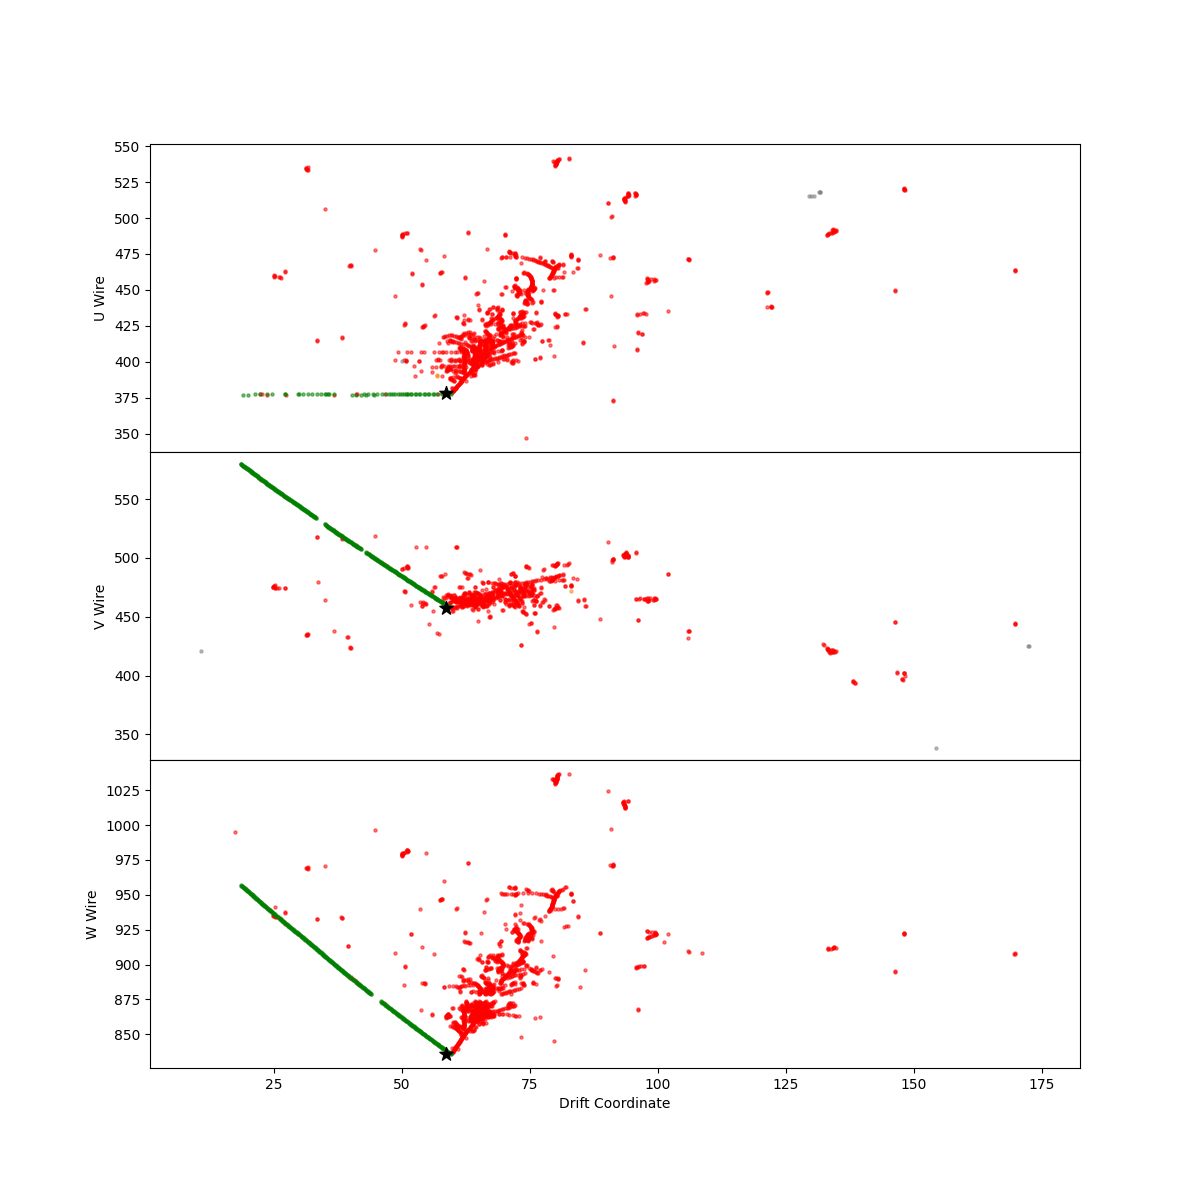

In [8]:
####################################
# TRUE NEUTRINO INTERACTION HITS
####################################

plt.subplots(nrows = 3, ncols = 1, gridspec_kw = {'wspace': 0, 'hspace': 0}, figsize=(12, 12))              

#############################
# U view (first induction)
#############################

plt.subplot(3, 1, 1)

other_mask = np.zeros(allUHits_drift_truth.shape, dtype=bool)

for pdg in [13, 11, 2212, 211, 22] :
    plt.scatter(allUHits_drift_truth[allUHits_owner_truth == pdg], allUHits_wire_truth[allUHits_owner_truth == pdg], color = pdgColours_graph.get(pdg), s = 5.0, alpha = 0.5)
    other_mask = np.logical_or(other_mask, allUHits_owner_truth == pdg)
    
other_mask = np.logical_not(other_mask)
plt.scatter(allUHits_drift_truth[other_mask], allUHits_wire_truth[other_mask], color = 'tab:gray', s = 5.0, alpha = 0.5)
plt.scatter(trueNuVertexX_event, uTrueNuVertex_wire_event, color = 'black', s = 100.0, marker='*')

plt.xlim([driftMin_truth - buffer, driftMax_truth + buffer])
plt.ylim([wireMinU_truth - buffer, wireMaxU_truth + buffer])
    
plt.ylabel("U Wire")
plt.gca().axes.get_xaxis().set_visible(False)
    
#############################
# V view (second induction)
#############################

plt.subplot(3, 1, 2)

other_mask = np.zeros(allVHits_drift_truth.shape, dtype=bool)

for pdg in [13, 11, 2212, 211, 22] :
    plt.scatter(allVHits_drift_truth[allVHits_owner_truth == pdg], allVHits_wire_truth[allVHits_owner_truth == pdg], color = pdgColours_graph.get(pdg), s = 5.0, alpha = 0.5)
    other_mask = np.logical_or(other_mask, allVHits_owner_truth == pdg)
    
other_mask = np.logical_not(other_mask)
plt.scatter(allVHits_drift_truth[other_mask], allVHits_wire_truth[other_mask], color = 'tab:gray', s = 5.0, alpha = 0.5)
plt.scatter(trueNuVertexX_event, vTrueNuVertex_wire_event, color = 'black', s = 100.0, marker='*')

plt.xlim([driftMin_truth - buffer, driftMax_truth + buffer])
plt.ylim([wireMinV_truth - buffer, wireMaxV_truth + buffer])
    
plt.ylabel("V Wire")
plt.gca().axes.get_xaxis().set_visible(False)

#############################
# W view (collection)
#############################

plt.subplot(3, 1, 3)

other_mask = np.zeros(allWHits_drift_truth.shape, dtype=bool)

for pdg in [13, 11, 2212, 211, 22] :
    plt.scatter(allWHits_drift_truth[allWHits_owner_truth == pdg], allWHits_wire_truth[allWHits_owner_truth == pdg], color = pdgColours_graph.get(pdg), s = 5.0, alpha = 0.5)
    other_mask = np.logical_or(other_mask, allWHits_owner_truth == pdg)
    
other_mask = np.logical_not(other_mask)
plt.scatter(allWHits_drift_truth[other_mask], allWHits_wire_truth[other_mask], color = 'tab:gray', s = 5.0, alpha = 0.5)
plt.scatter(trueNuVertexX_event, wTrueNuVertex_wire_event, color = 'black', s = 100.0, marker='*')
        
plt.xlim([driftMin_truth - buffer, driftMax_truth + buffer])
plt.ylim([wireMinW_truth - buffer, wireMaxW_truth + buffer])
    
plt.ylabel("W Wire")
plt.xlabel("Drift Coordinate")
plt.show()

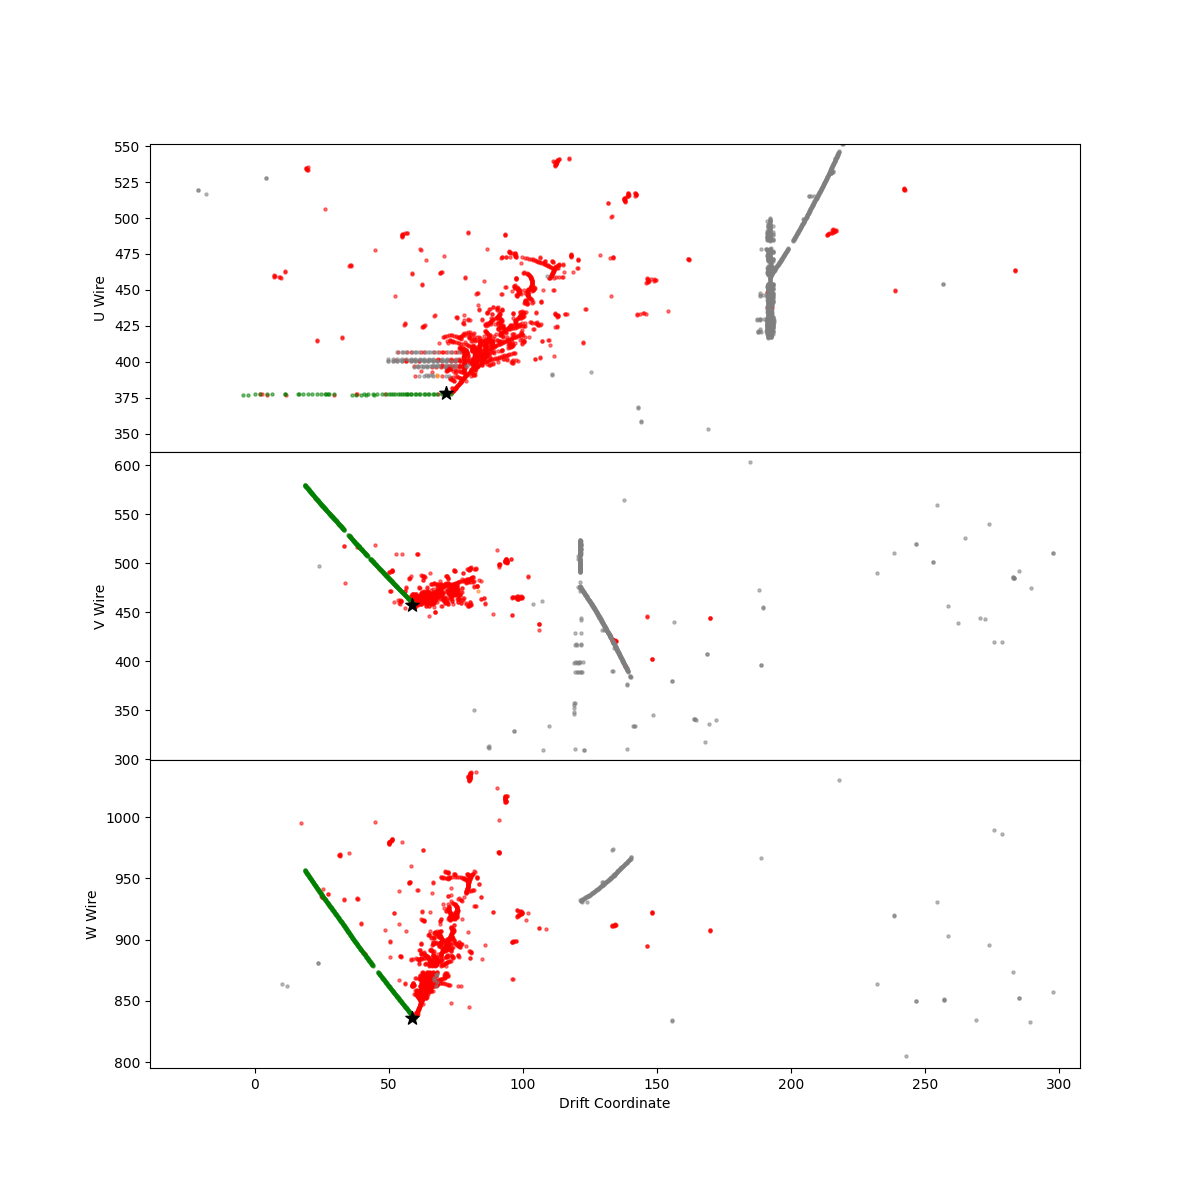

In [9]:
#############################
# ALL HITS IN RECO SLICE
#############################

plt.subplots(nrows = 3, ncols = 1, gridspec_kw = {'wspace': 0, 'hspace': 0}, figsize=(12, 12))              

#############################
# U view (first induction)
#############################

plt.subplot(3, 1, 1)

other_mask = np.zeros(allUHits_drift_inSlice.shape, dtype=bool)

for pdg in [13, 11, 2212, 211, 22] :
    plt.scatter(allUHits_drift_inSlice[allUHits_owner_inSlice == pdg], allUHits_wire_inSlice[allUHits_owner_inSlice == pdg], color = pdgColours_graph.get(pdg), s = 5.0, alpha = 0.5)
    other_mask = np.logical_or(other_mask, allUHits_owner_inSlice == pdg)
    
other_mask = np.logical_not(other_mask)
plt.scatter(allUHits_drift_inSlice[other_mask], allUHits_wire_inSlice[other_mask], color = 'tab:gray', s = 5.0, alpha = 0.5)
plt.scatter(trueNuVertexX_event, uTrueNuVertex_wire_event, color = 'black', s = 100.0, marker='*')

plt.xlim([driftMin_truth - buffer, driftMax_truth + buffer])
plt.ylim([wireMinU_truth - buffer, wireMaxU_truth + buffer])
    
plt.ylabel("U Wire")
plt.gca().axes.get_xaxis().set_visible(False)
    
#############################
# V view (second induction)
#############################

plt.subplot(3, 1, 2)

other_mask = np.zeros(allVHits_drift_inSlice.shape, dtype=bool)

for pdg in [13, 11, 2212, 211, 22] :
    plt.scatter(allVHits_drift_inSlice[allVHits_owner_inSlice == pdg], allVHits_wire_inSlice[allVHits_owner_inSlice == pdg], color = pdgColours_graph.get(pdg), s = 5.0, alpha = 0.5)
    other_mask = np.logical_or(other_mask, allVHits_owner_inSlice == pdg)
    
other_mask = np.logical_not(other_mask)
plt.scatter(allVHits_drift_inSlice[other_mask], allVHits_wire_inSlice[other_mask], color = 'tab:gray', s = 5.0, alpha = 0.5)
plt.scatter(trueNuVertexX_event, vTrueNuVertex_wire_event, color = 'black', s = 100.0, marker='*')
        
plt.xlim([driftMin_inSlice - buffer, driftMax_inSlice + buffer])
plt.ylim([wireMinV_inSlice - buffer, wireMaxV_inSlice + buffer])
    
plt.ylabel("V Wire")
plt.gca().axes.get_xaxis().set_visible(False)

#############################
# W view (collection)
#############################

plt.subplot(3, 1, 3)

other_mask = np.zeros(allWHits_drift_inSlice.shape, dtype=bool)

for pdg in [13, 11, 2212, 211, 22] :
    plt.scatter(allWHits_drift_inSlice[allWHits_owner_inSlice == pdg], allWHits_wire_inSlice[allWHits_owner_inSlice == pdg], color = pdgColours_graph.get(pdg), s = 5.0, alpha = 0.5)
    other_mask = np.logical_or(other_mask, allWHits_owner_inSlice == pdg)
    
other_mask = np.logical_not(other_mask)
plt.scatter(allWHits_drift_inSlice[other_mask], allWHits_wire_inSlice[other_mask], color = 'tab:gray', s = 5.0, alpha = 0.5)
plt.scatter(trueNuVertexX_event, wTrueNuVertex_wire_event, color = 'black', s = 100.0, marker='*')
        
plt.xlim([driftMin_inSlice - buffer, driftMax_inSlice + buffer])
plt.ylim([wireMinW_inSlice - buffer, wireMaxW_inSlice + buffer])
    
plt.ylabel("W Wire")
plt.xlabel("Drift Coordinate")
plt.show()


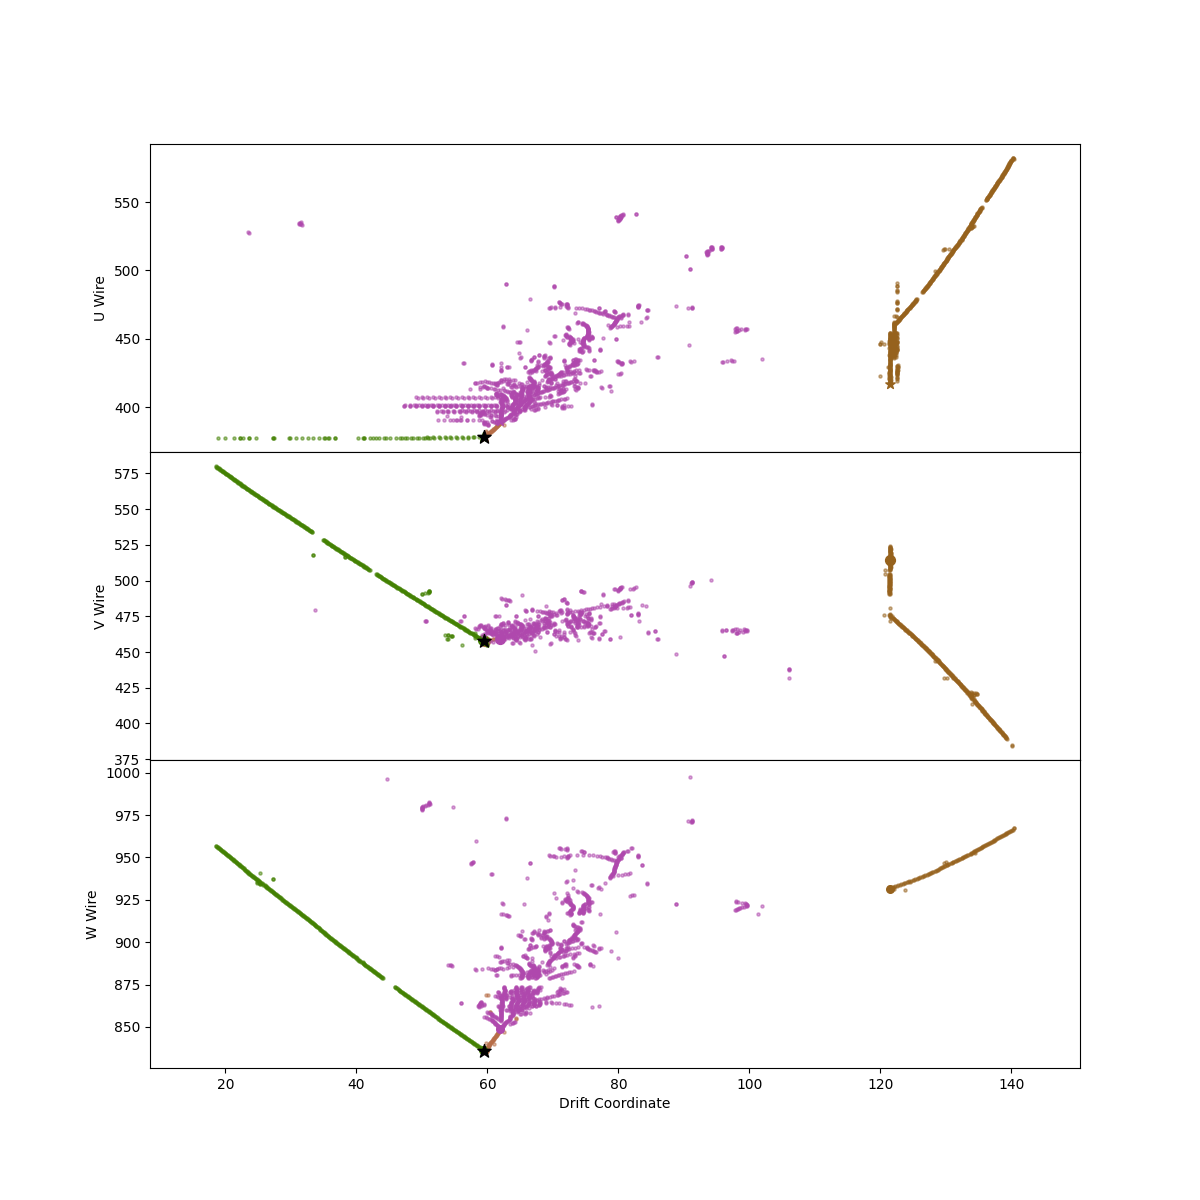

In [10]:
#############################
# RECONSTRUCTION
#############################

plt.subplots(nrows = 3, ncols = 1, gridspec_kw = {'wspace': 0, 'hspace': 0}, figsize=(12, 12))              

#############################
# U view (first induction)
#############################

plt.subplot(3, 1, 1)

for iParticle in range(nParticles) : 
    
    truePDG_particle = truePDG_event[iParticle]
    generation_particle = generation_event[iParticle]
    pandoraPFPCode_particle = pandoraPFPCode_event[iParticle]
    
    uRecoVertex_wire_particle = uRecoVertex_wire_event[iParticle]
    uRecoVertex_drift_particle = uRecoVertex_drift_event[iParticle]
    uHits_wire_particle = np.array(uHits_wire_event[iParticle])
    uHits_drift_particle = np.array(uHits_drift_event[iParticle])
    
    plt.scatter(uHits_drift_particle, uHits_wire_particle, color = particleColours[iParticle], s = 5.0, alpha = 0.5)
    plt.scatter(uRecoVertex_drift_particle, uRecoVertex_wire_particle, color = particleColours[iParticle], s = 50.0, marker='*')
        
    plt.xlim([driftMin_slice - buffer, driftMax_slice + buffer])
    plt.ylim([wireMinU_slice - buffer, wireMaxU_slice + buffer])
    
    
plt.scatter(recoNuVertexX_event, uRecoNuVertex_wire_event, color = 'black', s = 100.0, marker='*')

plt.ylabel("U Wire")
plt.gca().axes.get_xaxis().set_visible(False)
    
#############################
# V view (second induction)
#############################

plt.subplot(3, 1, 2)

for iParticle in range(nParticles) : 
    
    truePDG_particle = truePDG_event[iParticle]
    generation_particle = generation_event[iParticle]
    
    vRecoVertex_wire_particle = vRecoVertex_wire_event[iParticle]
    vRecoVertex_drift_particle = vRecoVertex_drift_event[iParticle]
    
    vHits_wire_particle = np.array(vHits_wire_event[iParticle])
    vHits_drift_particle = np.array(vHits_drift_event[iParticle])

    plt.scatter(vHits_drift_particle, vHits_wire_particle, color = particleColours[iParticle], s = 5.0, alpha = 0.5)
    plt.scatter(vRecoVertex_drift_particle, vRecoVertex_wire_particle, color = particleColours[iParticle], s = 50.0, marker='*')
    
    plt.xlim([driftMin_slice - buffer, driftMax_slice + buffer])
    plt.ylim([wireMinV_slice - buffer, wireMaxV_slice + buffer])
    
plt.scatter(recoNuVertexX_event, vRecoNuVertex_wire_event, color = 'black', s = 100.0, marker='*')
    
plt.ylabel("V Wire")
plt.gca().axes.get_xaxis().set_visible(False)

#############################
# W view (collection)
#############################

plt.subplot(3, 1, 3)

for iParticle in range(nParticles) : 
    
    truePDG_particle = truePDG_event[iParticle]
    generation_particle = generation_event[iParticle]
    
    wRecoVertex_wire_particle = wRecoVertex_wire_event[iParticle]
    wRecoVertex_drift_particle = wRecoVertex_drift_event[iParticle]
    
    wHits_wire_particle = np.array(wHits_wire_event[iParticle])
    wHits_drift_particle = np.array(wHits_drift_event[iParticle])
    
    plt.scatter(wHits_drift_particle, wHits_wire_particle, color = particleColours[iParticle], s = 5.0, alpha = 0.5)
    plt.scatter(wRecoVertex_drift_particle, wRecoVertex_wire_particle, color = particleColours[iParticle], s = 50.0, marker='*')
    
    plt.xlim([driftMin_slice - buffer, driftMax_slice + buffer])
    plt.ylim([wireMinW_slice - buffer, wireMaxW_slice + buffer])
    
plt.scatter(recoNuVertexX_event, wRecoNuVertex_wire_event, color = 'black', s = 100.0, marker='*')
    
plt.ylabel("W Wire")


plt.xlabel("Drift Coordinate")
plt.show()

-------------------------------------


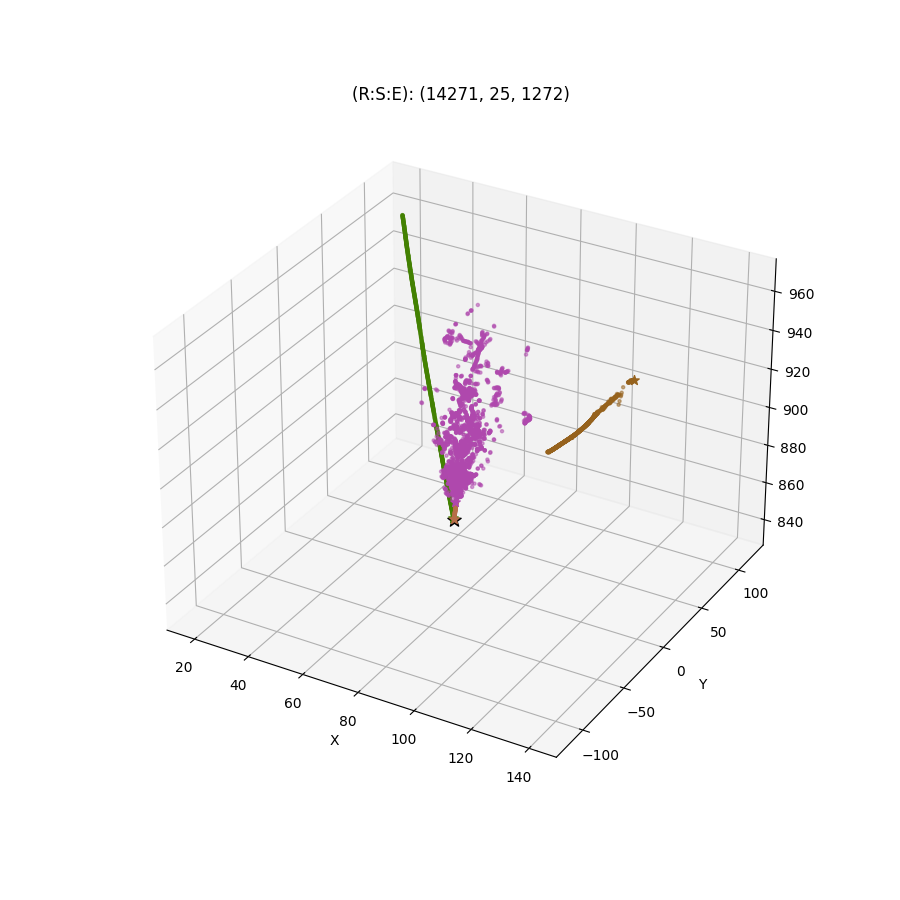

In [14]:
fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')

plt.title('(R:S:E): (' + str(run_event) + ", " + str(subrun_event) + ", " + str(event_event) + ")")
plt.xlabel('X')
plt.ylabel('Y')

for iParticle in range(nParticles) : 
    
    truePDG_particle = truePDG_event[iParticle]
    recoVertexX_particle = recoVertexX_event[iParticle]
    recoVertexY_particle = recoVertexY_event[iParticle]
    recoVertexZ_particle = recoVertexZ_event[iParticle]
    spacePointsX_particle = np.array(spacePointsX_event[iParticle])
    spacePointsY_particle = np.array(spacePointsY_event[iParticle])
    spacePointsZ_particle = np.array(spacePointsZ_event[iParticle])
    
    generation_particle = generation_event[iParticle]
    
    if (spacePointsX_particle.shape[0] == 0) :
        continue
    
    ax.scatter(spacePointsX_particle, spacePointsY_particle, spacePointsZ_particle, color = particleColours[iParticle], s = 5.0, alpha = 0.5)
    ax.scatter(recoVertexX_particle, recoVertexY_particle, recoVertexZ_particle, color = particleColours[iParticle], s = 50.0, marker='*')


print('-------------------------------------')

ax.scatter(recoNuVertexX_event, recoNuVertexY_event, recoNuVertexZ_event, color = "black", s = 100.0, marker='*')
plt.show()

#### plot only reco.. 